In [1]:
import pandas as pd
import matplotlib as mtb
import seaborn as sea
import matplotlib.pyplot as plt

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

## Po zaimportowaniu bibliotek wczytujemy dane z arkusza 

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


## Brakujące dane?

In [3]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

## Duplikaty (brak zduplikowanych kolumn)

In [4]:
df[df.duplicated()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
df.drop(columns=["body", "cabin", "boat"], inplace=True)

In [8]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,S,NaN


In [9]:
df.isnull().any(axis=1).any()

True

## Są wiersze w których nie ma żadnych danych jak np. 1309 więc go usuwam

In [10]:
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309     True
Length: 1310, dtype: bool

In [11]:
df[df.isnull().all(axis=1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.drop(index=1309)

In [13]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C,NaN


## Katastrofę przeżyło ok **38%** pasażerów

In [14]:
df['survived'].value_counts(normalize=True)

survived
0.0    0.618029
1.0    0.381971
Name: proportion, dtype: float64

## Pośród ocalałych 72,7 % to kobiety

<Axes: xlabel='sex'>

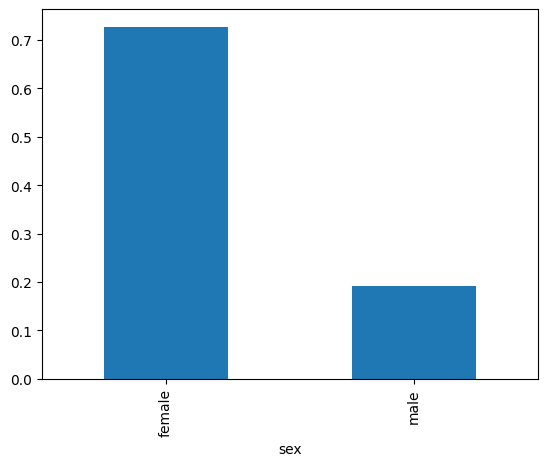

In [15]:
df.groupby('sex')['survived'].mean().plot(kind='bar')

In [16]:
df.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

## Wiek u osób które przeżyły oraz tych którym sie nie udało był bardzo podobno więc zakładamy że nie miał on większego wpływu na przeżycie

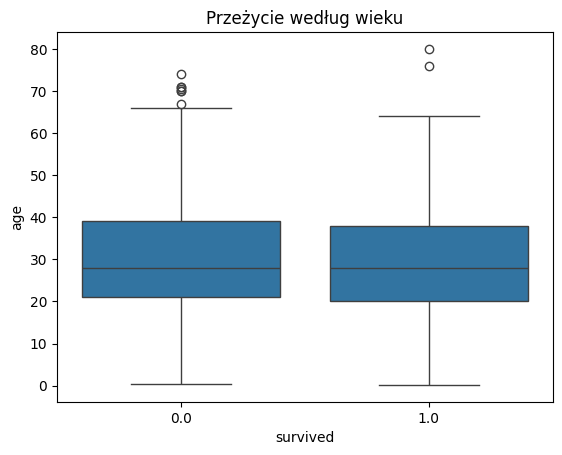

In [17]:
sea.boxplot(data=df, x='survived', y='age')
plt.title("Przeżycie według wieku")
plt.show()

## 40% osób które ocalały mioło bilety 1 klasy, 23% miało bilet 2 klasy zaś 33% posiadało bilet 3 klasy co pokazuje że osoby z biletami 1 klasy miały największe szanse na przezycie

In [18]:
survivors = df[df['survived'] == 1]
share = survivors['pclass'].value_counts(normalize=True)
print(share)

pclass
1.0    0.400
3.0    0.362
2.0    0.238
Name: proportion, dtype: float64


## Dzieci miały znacznie większą szanse na przetrwanie

In [19]:
df['Is_Child'] = df['age'] < 15
df.groupby('Is_Child')['survived'].mean()

Is_Child
False    0.365833
True     0.559633
Name: survived, dtype: float64

## Przeżywalność dzieci z biletami klasy 1 wynosiła 86% w 2 klasie to 96% ale dzieci w klasie 3 miały tylko 39% szans na przetrwanie, szanse bardzo podobne do statystyk dorosłych z tej klasy co mogło sie utrudnionym dostępem do szalup

In [20]:
df[df['age'] < 15].groupby('pclass')['survived'].mean()

pclass
1.0    0.857143
2.0    0.962963
3.0    0.386667
Name: survived, dtype: float64

Text(0.5, 1.0, 'Przeżywalność dzieci według klasy')

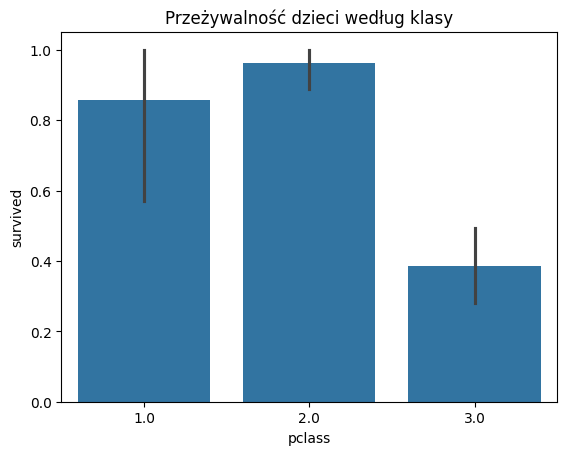

In [21]:
sea.barplot(data=df[df['age'] < 15], x='pclass', y='survived')
plt.title("Przeżywalność dzieci według klasy")


## widzimy też że około 55 % pasażerów do 15 roku życia przetrwało katastrofę

In [22]:
df[df['age'] < 15]['survived'].mean()

0.5596330275229358

## widać też ze port w którym pasażerowie wsiadali miał jakiś wpływ na prztrwanie osoby którek wsiadły w porcie C miały najwiekszą przeżywalność 55%, osoby z portu Q 35%, port S 33%.

In [23]:
df.groupby('embarked')['survived'].mean()

embarked
C    0.555556
Q    0.357724
S    0.332604
Name: survived, dtype: float64

## Osoby podróżujące samotnie oraz osoby z rodziną 4-6 miały niższe szanse przeżycia niż osoby podróżujące w rodzinie 1-2 u których szansa przetrwania wynosiła ponad 50% lecz największe szanse miały rodziny 3 osobowe to aż 69%

In [24]:
df['FamilySize'] = df['sibsp'] + df['parch']

df.groupby('FamilySize')['survived'].mean()

FamilySize
0.0     0.302532
1.0     0.536170
2.0     0.566038
3.0     0.697674
4.0     0.272727
5.0     0.200000
6.0     0.250000
7.0     0.000000
10.0    0.000000
Name: survived, dtype: float64

## Podsumowując 
    1.     Katastrofę przetrwało 38% pasażerów.
    2.     Posród ocalałych 72,7% to kobiety.
    3.     Wiek nie miał większego wpływu na przeżycie wykluczając dzieci do 15 roku    życia z których 55% przetrwało katastrofę lecz większośc z nich wywodziła sie z pasażerów z klas 1 i 2 w klasie 3 to tylko 39%.
    4.    Widzimy również że osoby z biletami klasy 1 miały najwiekszę szanse na przetrwanie.
    5.    Port w jakim wsiadali pasażerowie też miał znaczenie.
    6.    Wielkośc rodzin też miała wpływ na przetrwanie.
## Dane z Titanica pokazują jak różne czynniki w tym płeć, wiek, obecność najbliższych oraz status finansowy mogą decydować o przetrwaniu.

In [25]:
!jupyter nbconvert titanic.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook titanic.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 360863 bytes to titanic.slides.html
